# DESCRIPTIVE ANALYSIS OF NEW YORK AIR-BNB(2019)


## INTRODUCTION :

## PURPOSE :

Exploratory Analysis

## Importing Libraries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import os 
import pandas as pd
from scipy import stats

## Let's take a look at the Dataset

In [3]:
df = pd.read_csv('/content/sample_data/AB_NYC_2019.csv')
print(df.head())

     id  ... availability_365
0  2539  ...              365
1  2595  ...              355
2  3647  ...              365
3  3831  ...              194
4  5022  ...                0

[5 rows x 16 columns]


## Some more information about the dataset

In [7]:
print(df.info())
print("\n\n",df['neighbourhood'].value_counts())
print("\n\n",df['room_type'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# LET'S BEGIN WITH THE DESCRIPTIVE ANALYSIS

## Number of Listings by Boroughs

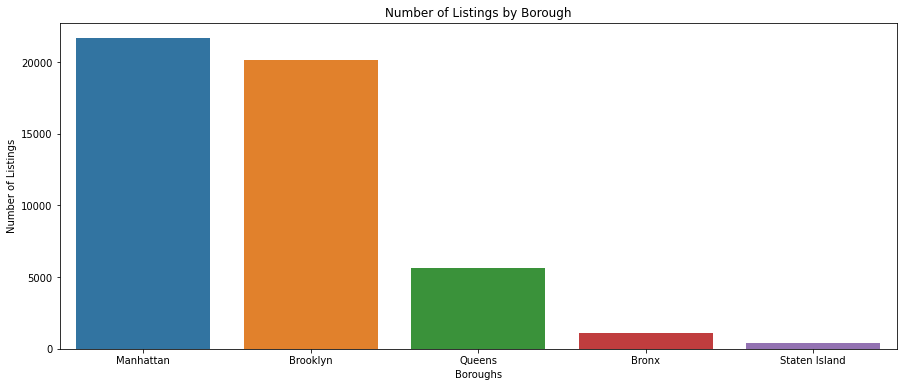

In [16]:
nh= df['neighbourhood_group'].value_counts().reset_index()

plt.figure(figsize=(15,6))
sns.barplot(x = nh['index'],y = nh['neighbourhood_group']);
plt.ylabel("Number of Listings")
plt.xlabel("Boroughs")
plt.title('Number of Listings by Borough');
plt.show()

It is clear that maximum number of listings are present in Manhattan and Brooklynn.

## Number of Listing by Room Type

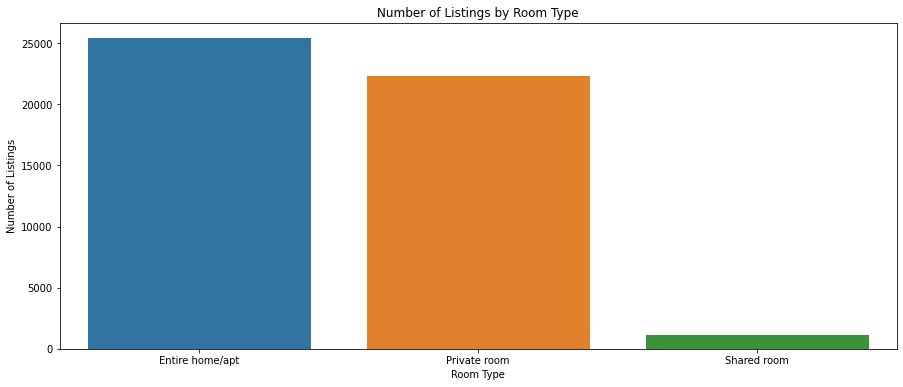

In [15]:
nh= df['room_type'].value_counts().reset_index()

plt.figure(figsize=(15,6))
sns.barplot(x=nh['index'],y=nh['room_type'])
plt.ylabel("Number of Listings")
plt.xlabel("Room Type")
plt.title('Number of Listings by Room Type')
plt.show()

It is seen that maximum number of listings are for Entire Home/Apartments

## Number of Listing by Room Type and Borough

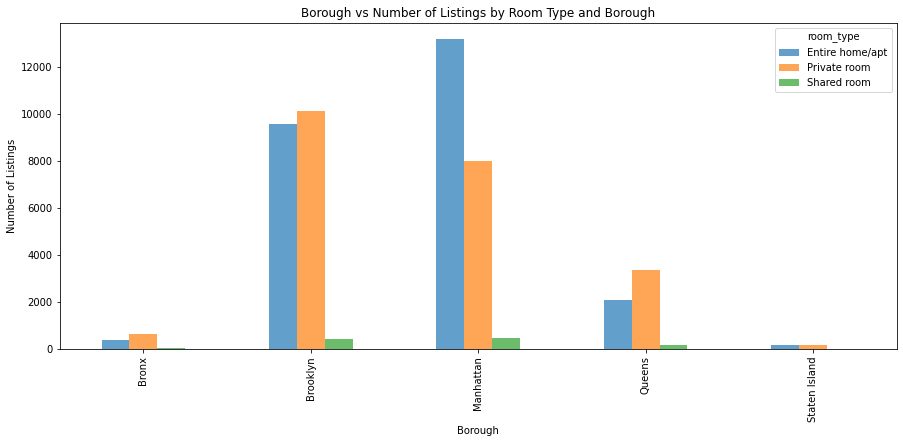

In [14]:
nh = df.groupby(['neighbourhood_group','room_type'])['id'].count().reset_index()
nhg = nh.pivot(index='neighbourhood_group',columns='room_type',values='id')
nhg.plot(kind='bar',figsize=(15,6),style="g",alpha=0.7);
plt.title('Borough vs Number of Listings by Room Type and Borough')
plt.ylabel('Number of Listings')
plt.xlabel('Borough')
plt.show()

It is seen that Manhattan has the maximum number of Entire homes/apartments

Brooklyn has more Private Rooms than Apartments

## Borough Price Distribution

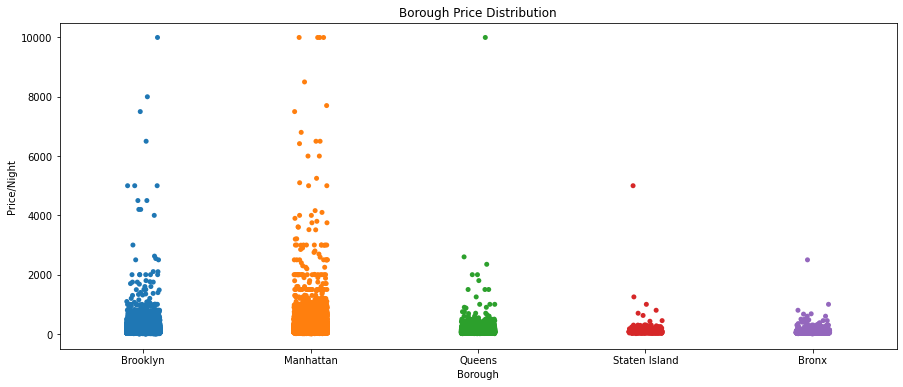

In [22]:
plt.figure(figsize=(15,6))
sns.stripplot(x="neighbourhood_group",y="price",data=df)
plt.title('Borough Price Distribution')
plt.xlabel('Borough')
plt.ylabel('Price/Night')
plt.show()

The above grapph shows that most of the high priced listings are present in Manhattan and Brooklyn.

The listings in Staten Island and Bronx do not go over $4000/night

## Room Type Price Distribution

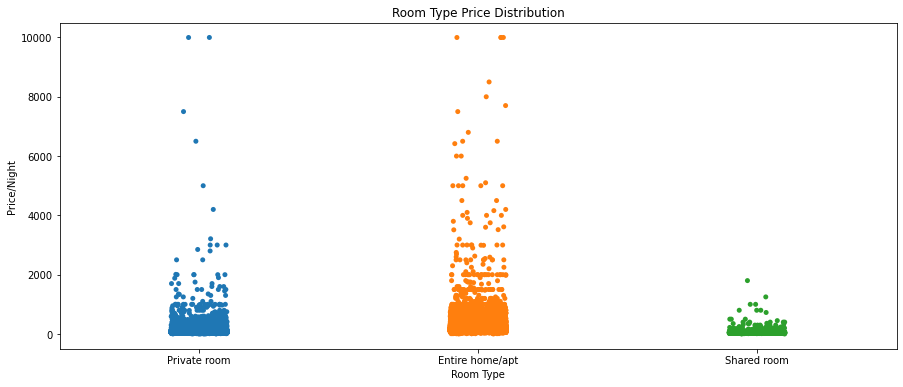

In [21]:
plt.figure(figsize=(15,6))
sns.stripplot(x="room_type",y="price",data=df)
plt.title('Room Type Price Distribution')
plt.xlabel('Room Type')
plt.ylabel('Price/Night')
plt.show()

It is seen that most of the listings are priced under $2000/night 


## Room Type Availability

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


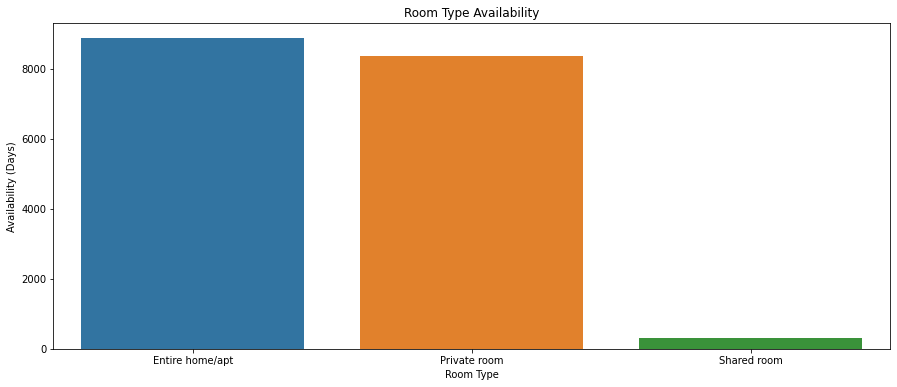

In [5]:
aval= df.loc[df['availability_365'] == 0]['room_type'].value_counts().reset_index()

plt.figure(figsize=(15, 6))
sns.barplot(aval['index'],aval['room_type']);
plt.title('Room Type Availability')
plt.ylabel('Availability (Days)')
plt.xlabel('Room Type')
plt.show()

The graph shows that Entire homes/Apartments and Private Rooms have a high availability.

## Top 10 Hosts with Highest Number of Listings

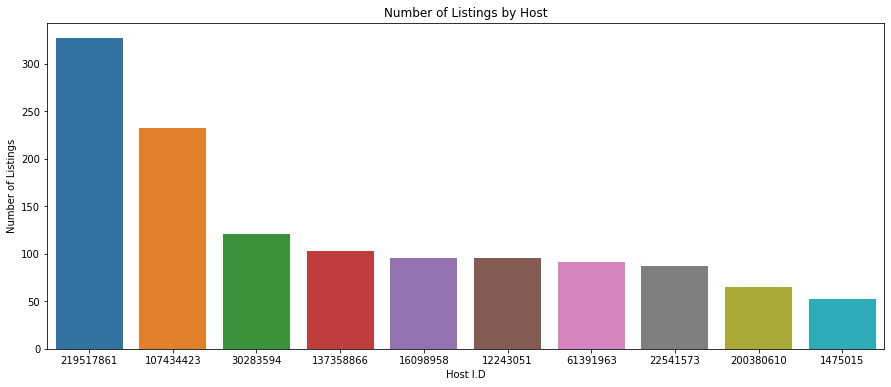

In [5]:
host = df.groupby("host_id").count().reset_index()
host = host.sort_values("id",ascending=False).head(10)


plt.figure(figsize=(15,6))
sns.barplot(x="host_id",y="id",data=host,order=host.sort_values('id',ascending=False).host_id)
plt.ylabel("Number of Listings")
plt.xlabel("Host I.D")
plt.title('Number of Listings by Host')
plt.show()

The graph shows the 10 hosts with the highest number of listings

## CONCLUSION:

*   Maximum number of Listings are available in Manhattan and Brooklyn
*   Entire Homes/Apartments are the highest listed room types followed by Private Room
*   Most of the listings are available under $2000/night
*   The more expensive rooms ($4000 and above) are only available in Manhattan and Brooklyn
*   Almost all the listings have 365 day availability





